In [10]:
# Loading the necessary packages
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import pandas as pd
sys.path.append('/home/victor/git/rto/src')

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = "dotted"

logging.getLogger('matplotlib.font_manager').disabled = True
logging.getLogger('matplotlib.ticker').disabled = True

from rto.experiment.analysis import ExperimentAnalyzer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
DB_FILE = '/home/victor/git/rto/tests/test.db'
start_id = 88
u_plant = [18.4427644, 0.00110823777, 227.792418]
f_plant = -0.5085930760109818

In [15]:
analyzer = ExperimentAnalyzer(DB_FILE)
results = analyzer.load_by_id(start_id)
results_processed = analyzer.pre_process(results, f_plant, u_plant)

results_processed['rto.type'] = results_processed['rto.type'].map(lambda x: x.split('-')[0].replace('run_rto_', ''))

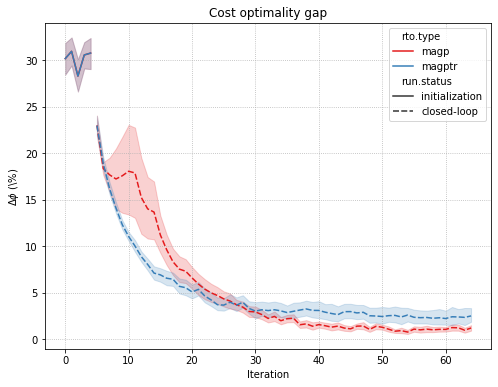

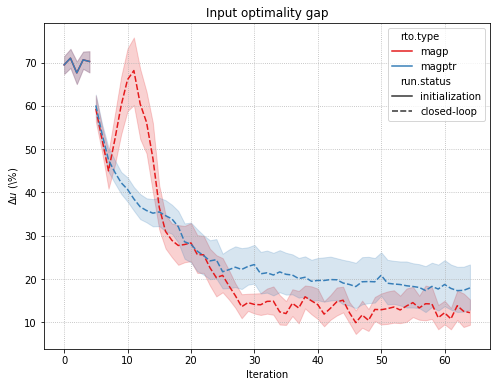

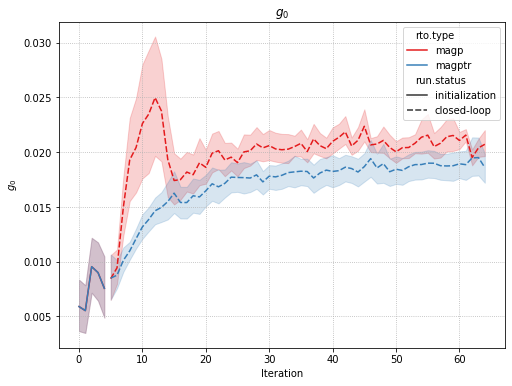

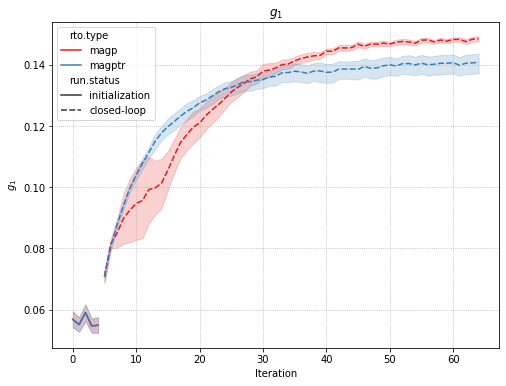

In [19]:
_ = analyzer.plot_by_iteration(results_processed, 'dPhi', '$\Delta \phi$ (\%)', 'Cost optimality gap', style='run.status', hue='rto.type')
_ = analyzer.plot_by_iteration(results_processed, 'du', '$\Delta u$ (\%)', 'Input optimality gap', style='run.status', hue='rto.type')
_ = analyzer.plot_by_iteration(results_processed, 'g_0', '$g_0$', '$g_0$', style='run.status', hue='rto.type')
_ = analyzer.plot_by_iteration(results_processed, 'g_1', '$g_1$', '$g_1$', style='run.status', hue='rto.type')